# Level 3 Task 1: Predictive Modeling

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading a csv file
df = pd.read_csv("C:/Users/Rohit Gupta/Desktop/Cognify dataset.csv")

In [4]:
print(df.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [5]:
df['Cuisines'].fillna("not given", inplace=True)

In [6]:
print(df.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


### Build a regression model to predict the aggregate rating of a restaurant based on available features

In [7]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [8]:
# Encoding categorical variables
df['Has Table Booking'] = (df['Has Table booking'] == 'Yes').astype(int)
df['Has Online Delivery'] = (df['Has Online delivery'] == 'Yes').astype(int)

# Selecting features and target variable
X = df[['Average Cost for two', 'Has Table Booking', 'Has Online Delivery', 'Price range']]
y = df['Aggregate rating']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.7409747034700305


### Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Encoding categorical variables
df['Has Table Booking'] = (df['Has Table booking'] == 'Yes').astype(int)
df['Has Online Delivery'] = (df['Has Online delivery'] == 'Yes').astype(int)

# Selecting features and target variable
X = df[['Average Cost for two', 'Has Table Booking', 'Has Online Delivery', 'Price range']]
y = df['Aggregate rating']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 1.7409747034700305
Mean Absolute Error: 1.0928376707218084
R-squared: 0.2351092540461741


### Experiment with different algorithms (e.g.,linear regression, decision trees, random forest) and compare their performance

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Encoding categorical variables
df['Has Table Booking'] = (df['Has Table booking'] == 'Yes').astype(int)
df['Has Online Delivery'] = (df['Has Online delivery'] == 'Yes').astype(int)

# Selecting features and target variable
X = df[['Average Cost for two', 'Has Table Booking', 'Has Online Delivery', 'Price range']]
y = df['Aggregate rating']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing models
linear_reg_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)

# Training models
linear_reg_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_linear_reg = linear_reg_model.predict(X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_random_forest = random_forest_model.predict(X_test)

# Evaluating models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print("Model:", model_name)
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("R-squared:", r2)
    print()

print("Linear Regression Model:")
evaluate_model(y_test, y_pred_linear_reg, "Linear Regression")

print("Decision Tree Model:")
evaluate_model(y_test, y_pred_decision_tree, "Decision Tree")

print("Random Forest Model:")
evaluate_model(y_test, y_pred_random_forest, "Random Forest")

Linear Regression Model:
Model: Linear Regression
Mean Squared Error: 1.7409747034700305
Mean Absolute Error: 1.0928376707218084
R-squared: 0.2351092540461741

Decision Tree Model:
Model: Decision Tree
Mean Squared Error: 1.5218602834816084
Mean Absolute Error: 0.994562733254716
R-squared: 0.33137635765206463

Random Forest Model:
Model: Random Forest
Mean Squared Error: 1.519720382679258
Mean Absolute Error: 0.9938407284423281
R-squared: 0.33231651509244253



#### Overall, based on the above metrics, Decision Tree and Random Forest appear to be better suited for predicting restaurant ratings in this dataset compared to Linear Regression model. Also, R² values for all three models are relatively low, suggesting that there might be other factors influencing restaurant ratings that are not captured by the models.

# Level 3 Task 2: Customer Preference Analysis

### Analyze the relationship between the type of cuisine and the restaurant's rating


In [11]:
# Analyzing the relationship between cuisine and rating
avg_rating_by_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

print("Average rating by cuisine:")
print(avg_rating_by_cuisine)

Average rating by cuisine:
Cuisines
Continental, Indian             4.9
BBQ, Breakfast, Southern        4.9
Italian, Deli                   4.9
American, Caribbean, Seafood    4.9
Burger, Bar Food, Steak         4.9
American, Burger, Grill         4.9
Italian, Bakery, Continental    4.9
European, Asian, Indian         4.9
European, Contemporary          4.9
American, Coffee and Tea        4.9
Name: Aggregate rating, dtype: float64


### Identify the most popular cuisines among customers based on the number of votes

In [12]:
# Identifying the most popular cuisines based on the number of votes
most_popular_cuisines = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head(10)

print("Most popular cuisines based on the number of votes:")
print(most_popular_cuisines.head(10))

Most popular cuisines based on the number of votes:
Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


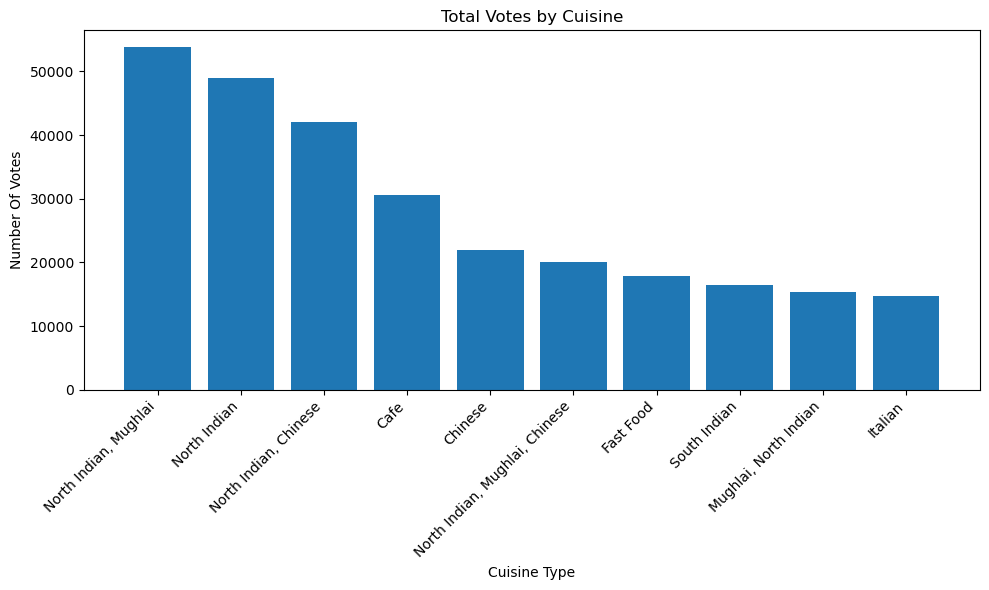

In [60]:
plt.figure(figsize=(10, 6))
plt.bar(most_popular_cuisines.index, most_popular_cuisines.values)
plt.xlabel("Cuisine Type")
plt.ylabel("Number Of Votes")
plt.title("Total Votes by Cuisine")
plt.xticks(rotation=45, ha="right") 
plt.tight_layout()
plt.show()

#### So, as per the above bar chart, North Indian, Mughlai is the most popular cuisine among the customers.

### Determine if there are any specific cuisines that tend to receive higher ratings

#### As per the above two tasks, it is clear that even though, North Indian and Mughlai are the cuisines that are most popular among the customers, but the restaurant that have Italian, Deli cuisine has the highest rating among the others.

# Level 3 Task 3: Data Visualization

### Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.)


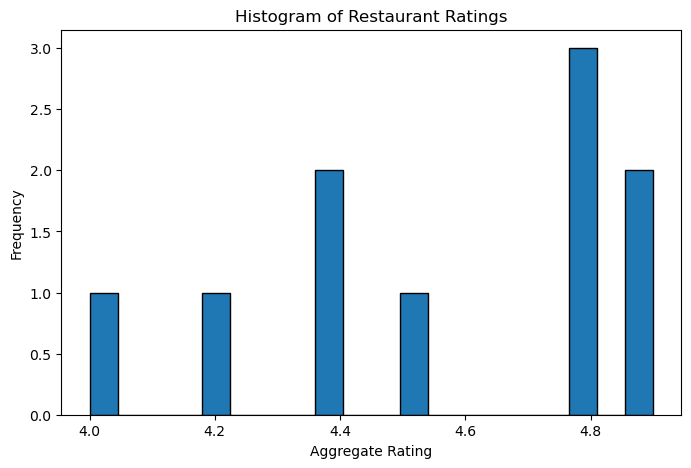

In [13]:
ratings = df["Aggregate rating"].head(10)

# Histogram
plt.figure(figsize=(8, 5)) 
plt.hist(ratings, bins=20, edgecolor='black')
plt.xlabel("Aggregate Rating")
plt.ylabel("Frequency")
plt.title("Histogram of Restaurant Ratings")
plt.show()

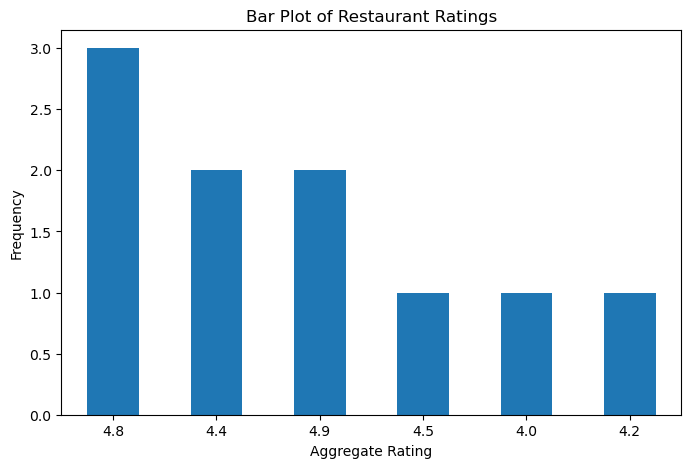

In [14]:
# Bar plot
plt.figure(figsize=(8, 5))
ratings.value_counts().plot(kind='bar') 
plt.xlabel("Aggregate Rating")
plt.ylabel("Frequency")
plt.title("Bar Plot of Restaurant Ratings")
plt.xticks(rotation=0)
plt.show()

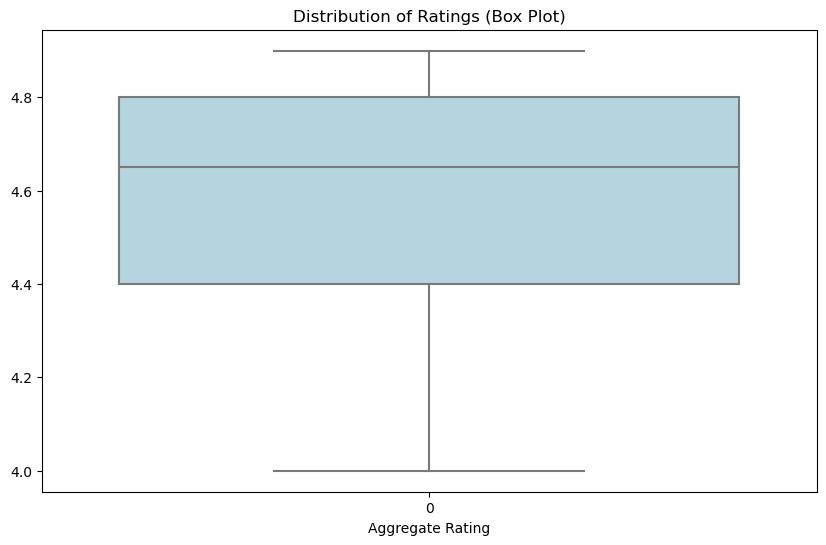

In [15]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(ratings, color='lightblue')
plt.xlabel('Aggregate Rating')
plt.title('Distribution of Ratings (Box Plot)')
plt.show()

### Compare the average ratings of different cuisines or cities using appropriate visualizations

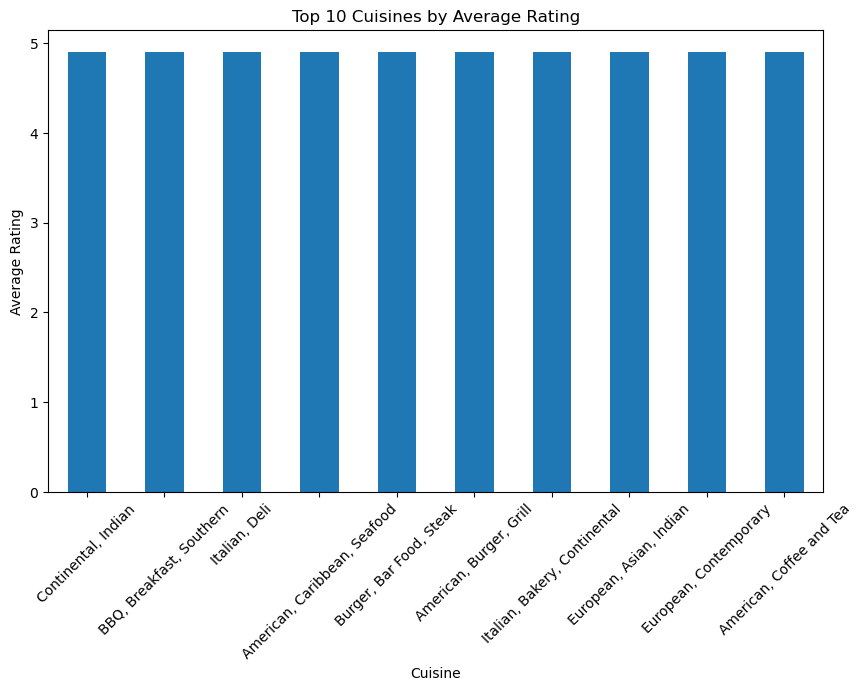

In [16]:
# Average rating by cuisine
avg_rating_by_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
avg_rating_by_cuisine.plot(kind='bar')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.title('Top 10 Cuisines by Average Rating')
plt.xticks(rotation=45)
plt.show()

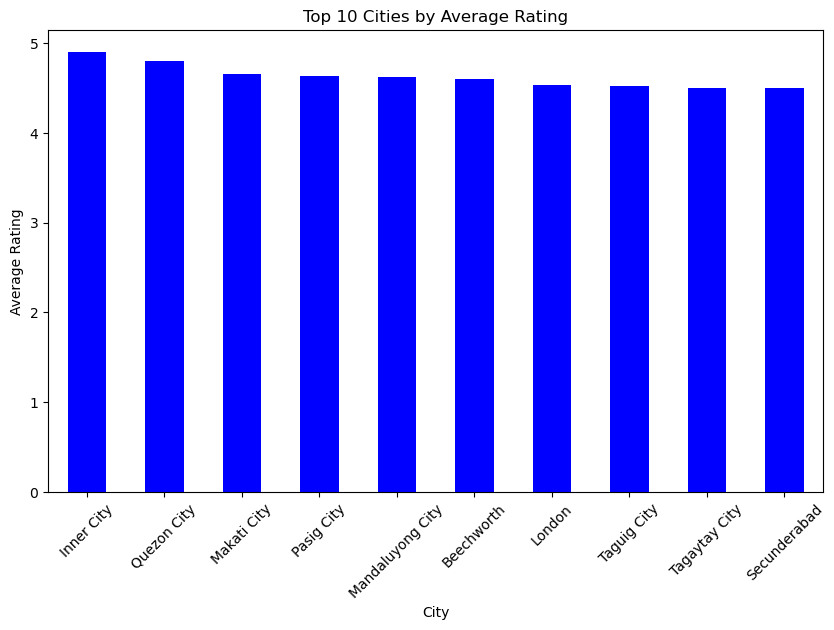

In [92]:
# Average rating by city
avg_rating_by_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
avg_rating_by_city.plot(kind='bar', color='blue')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.title('Top 10 Cities by Average Rating')
plt.xticks(rotation=45)
plt.show()

### Visualize the relationship between various features and the target variable to gain insights

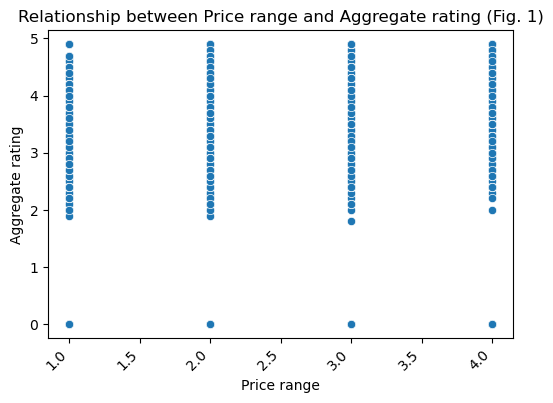

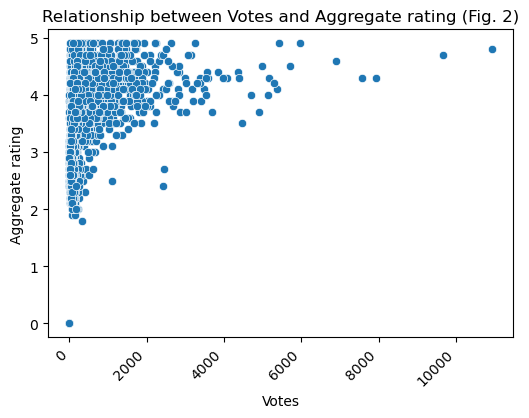

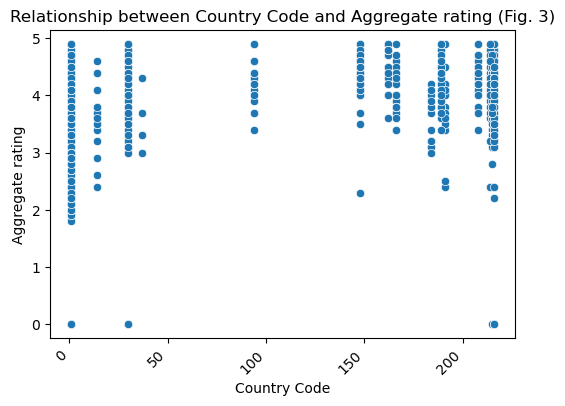

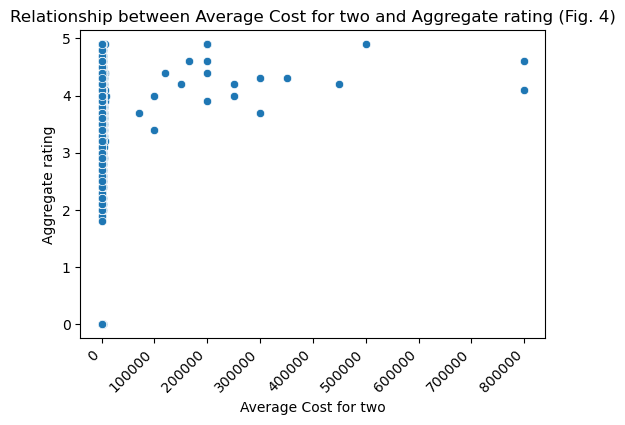

In [17]:
target_variable = "Aggregate rating"

numerical_features = ["Price range", "Votes", "Country Code", "Average Cost for two" ]

# Creating a function and naming scatter plots with sampling
def create_scatter_plot(feature, target_variable, df, fig_num):
  # Sampling data (up to 10000 points)
  sample_size = min(10000, len(df))
  sample_data = df.sample(n=sample_size, replace=False)

  # Create scatter plot
  plt.figure(figsize=(6, 4))
  sns.scatterplot(x=feature, y=target_variable, data=sample_data)
  plt.xlabel(feature)
  plt.ylabel(target_variable)
  plt.title(f"Relationship between {feature} and {target_variable} (Fig. {fig_num})")
  plt.xticks(rotation=45, ha="right")
  plt.show()

# Create scatter plots for each feature
fig_num = 1
for feature in numerical_features:
  create_scatter_plot(feature, target_variable, df.copy(), fig_num)
  fig_num += 1  # Increment figure number for each plot

### Interpretation

- Fig.1

The chart suggests a very weak positive correlation between price range and aggregate rating for restaurants. However, the data is scattered, indicating that many other factors can influence ratings besides price.

- Fig.2

It looks like there is a weak positive correlation between the number of Votes and the Aggregate Rating for restaurants. This means that as the number of votes increases, the average aggregate rating tends to increase slightly. However, the data points are scattered, indicating that the relationship is not very strong.

- Fig.3

It shows the distribution of Aggregate Rating for restaurants across different Country Codes. The medians (horizontal lines within the boxes) show that there are variations in average aggregate rating across different countries. Wider boxes indicate a larger spread in ratings within that country. This means restaurants within the same country can have ratings that vary more from the median compared to other countries.

- Fig.4

There appears to be a weak positive correlation between the two variables. This means that as the average cost for two increases, the aggregate rating also tends to increase slightly. However, the data points are scattered, indicating a weak association.association.countries.ntries.

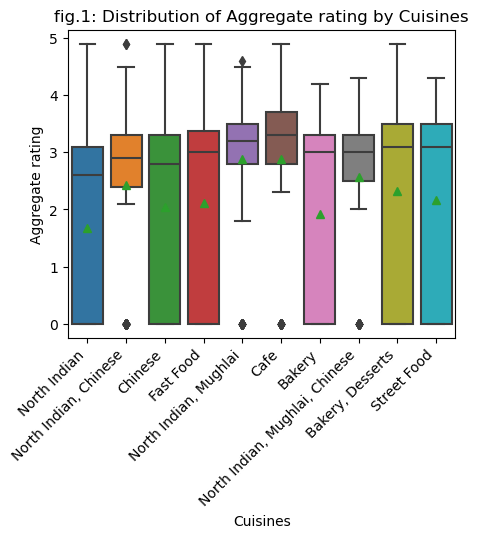

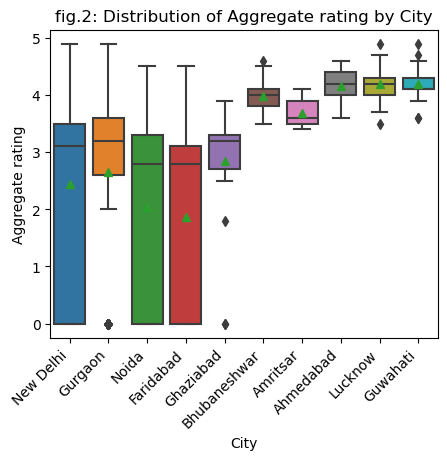

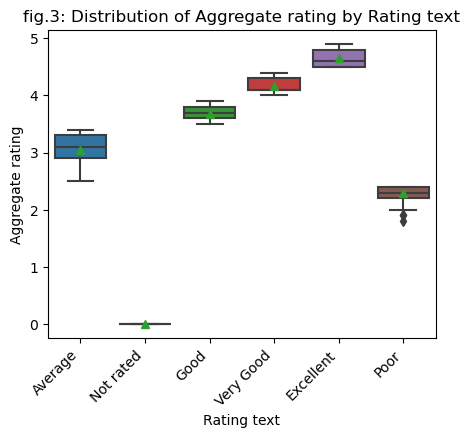

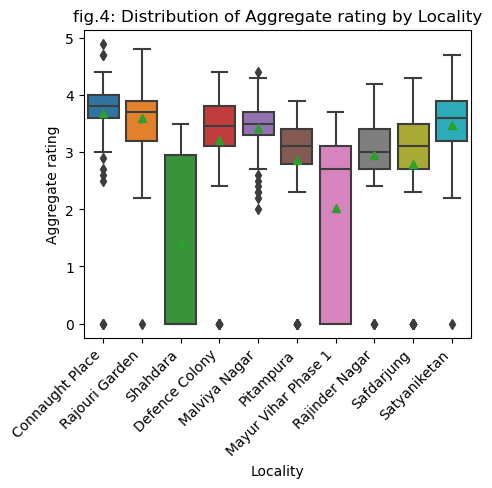

In [18]:
categorical_features = ["Cuisines", "City", "Rating text", "Locality"]

# Box plots for categorical features
fig_count = 1
for feature in categorical_features:
    plt.figure(figsize=(5, 4))
    sns.boxplot(x=feature, y='Aggregate rating', showmeans=True, data=df,
                order=df[feature].value_counts().iloc[:10].index)
    plt.xlabel(feature)
    plt.ylabel('Aggregate rating')
    plt.title(f"fig.{fig_count}: Distribution of Aggregate rating by {feature}")
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
    plt.show()
    fig_count += 1

### Interpretation

- Fig.1

The chart is showing the distribution of aggregate Rating for restaurants across different Cuisines.There are variations in average ratings for different cuisines.Some cuisines have higher median ratings than others, and there's also a variation in ratings within each cuisine.

- Fig.2

The chart is showing the distribution of aggregate ratings by city. In other words, it shows the average rating that each city received,  with higher bars indicating a higher average rating.

- Fig.3

The chart is showing the distribution of Aggregate rating by Rating text.The most common rating is "Good". There are more ratings of "Very Good" than "Excellent". Overall, it appears that the restaurants are performing well.

- Fig.4

The chart is showing the distribution of aggregate ratings by location. The spread of the ratings is larger in some places. Also, some outliers are also present in the data. 

# Thank You